In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from skimage import io
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from high_pass_filter import high_pass

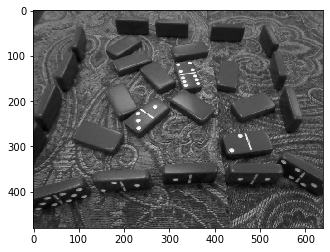

In [4]:
im = io.imread('bottom_b21.jpg',as_gray=True);
plt.imshow(im,cmap='gray');

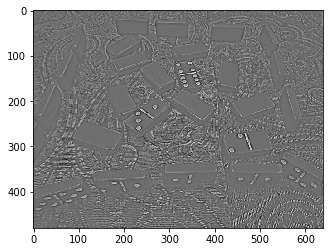

In [5]:
im = high_pass(im)
plt.imshow(im, cmap='gray')

In [6]:
thresh = threshold_otsu(im)
bw = closing(im > thresh, square(3))

In [7]:
cleared = clear_border(bw)

In [14]:
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=np.abs(im), bg_label=0)

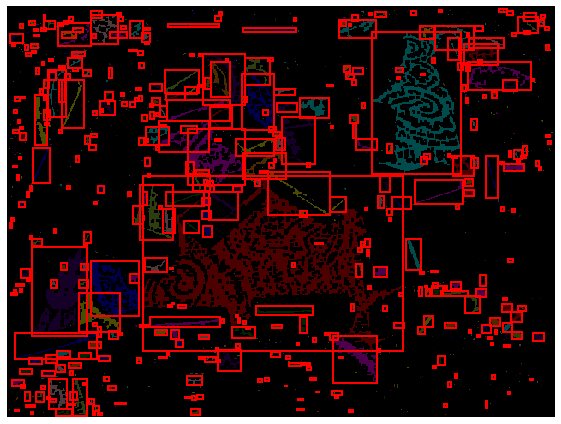

In [15]:
ig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 5:
        # draw rectangle around segmented dots
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()